# Elements of convex analysis

## Class 1: Univariate optimization

The purpose of this notebook is to implement methods for univariate optimization. The notebook will use helper functions to create and draw functions (in [ex1_helpers.py](ex1_helpers.py) file, but there is no need to look at it).

This exercise requires **numpy**, **matplotlib** and **autograd** libraries.

In [6]:
# a line making the graphs show up in the notebook
# you can safely ignore it (but run it!).
%matplotlib inline

# Some important imports:
from ex1_helpers import Function
import numpy as np

# Bogus search

In [3]:
# Sample implementation of algorithm that assumes that minimum is in the middle of the domain or at 0 and actually doesn't
# search very extensively.
# as arguments it takes the function object and number of function calls to perform
# It returns a tuple with all visited points in order of visit(for plotting purposes) and the minimizer it "found"
def bogus_search(function: Function, n: int):
    a, b = function.domain
    m = (a + b) / 2
    bogus_visited_points_in_order = [m]
    m_value = function.evaluate(m)
    bogus_minimizer = m
    if a <= 0 <= b and n > 1:
        bogus_visited_points_in_order.append(0)
        if m_value > function.evaluate(0):
            bogus_minimizer = 0

    return bogus_visited_points_in_order, bogus_minimizer

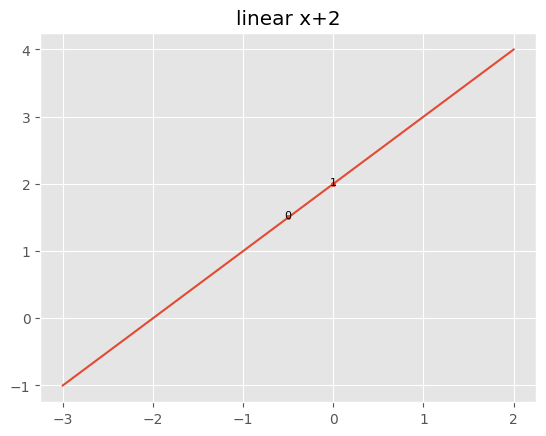

In [4]:
# To test your code first create some function, e.g. a linear function:

f = Function(lambda x: x+2,
             domain=(-3,2),
             name="linear x+2")

# Run the solution:
max_steps = 10
points, solution = bogus_search(f, max_steps)

# The function will plot itself and all points that where searched in order of visit
# By default it will annotate first and last 10 points.
f.plot(points=points)



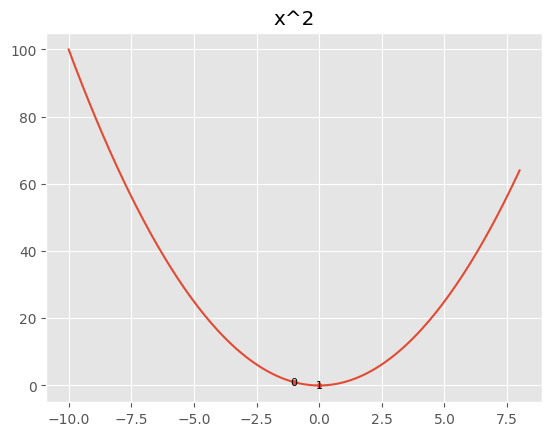

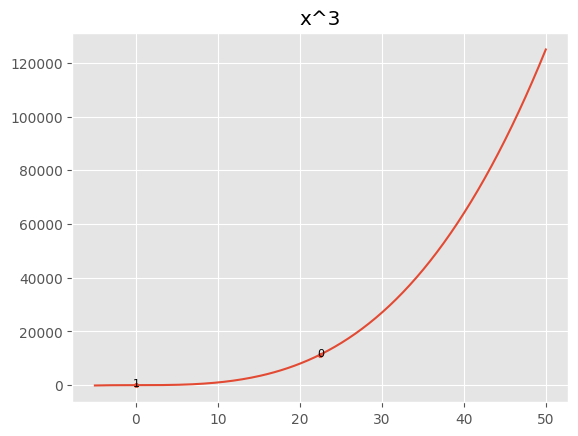

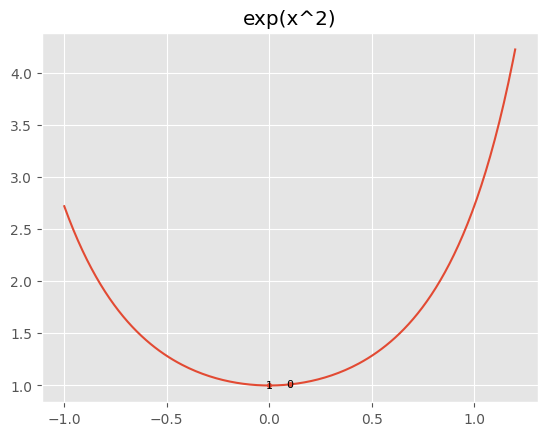

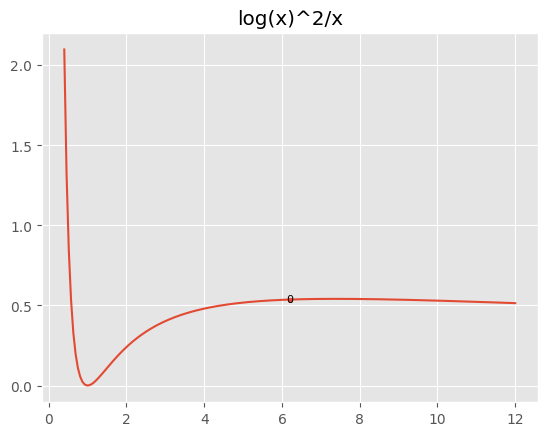

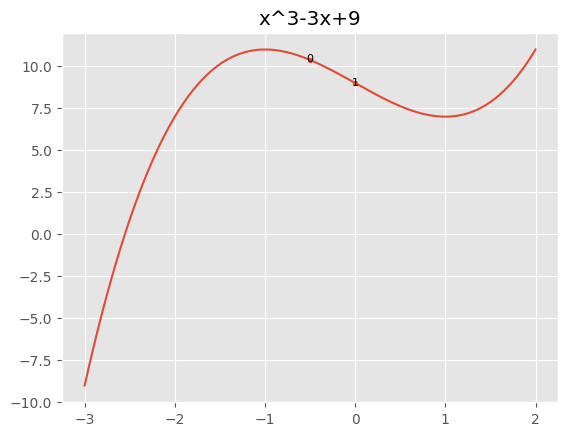

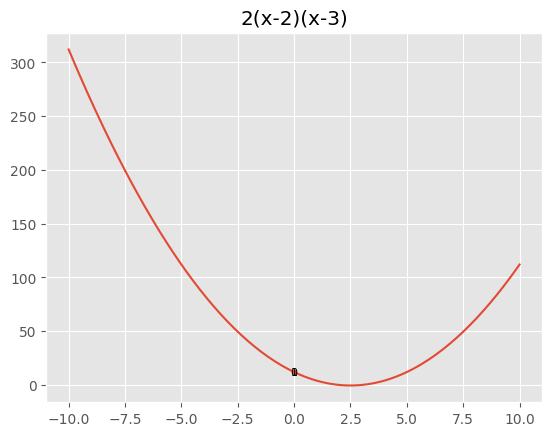

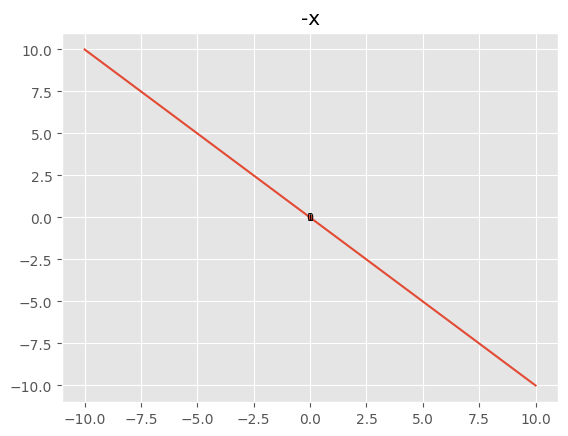

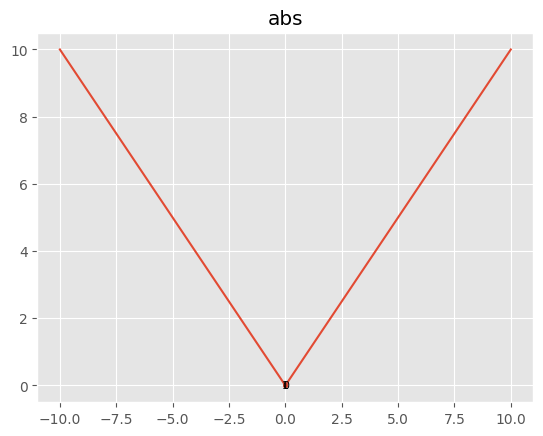

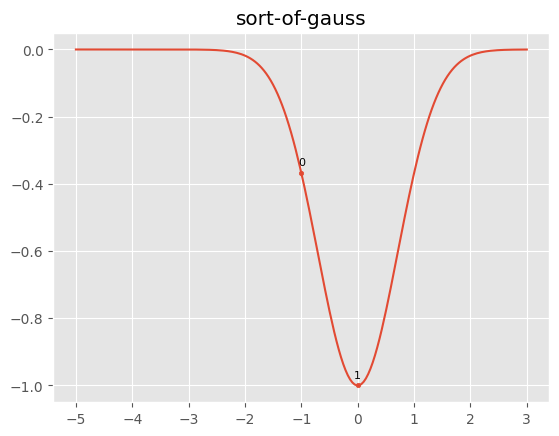

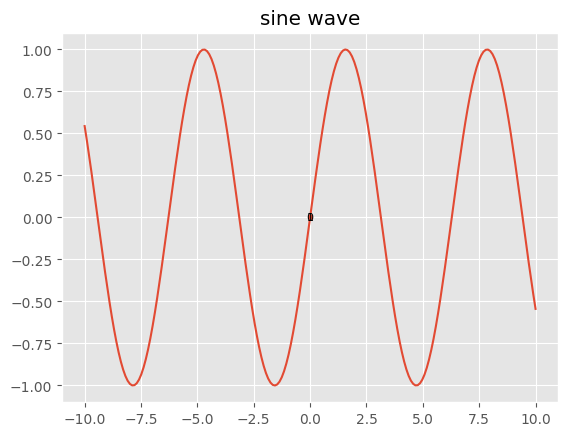

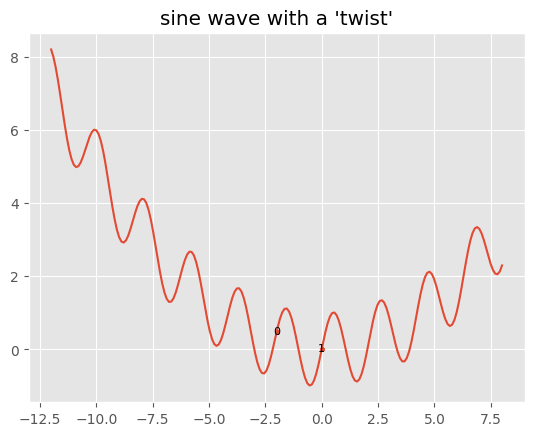

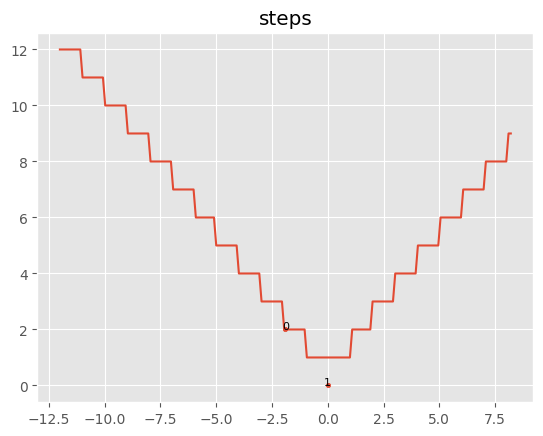

In [5]:
#You can test predefined functions and observe what happens
#(for methods you implement not bogus search)

# Later you can run predefined functions given in the file
from ex1_helpers import functions
for f in functions:
    points, solution = bogus_search(f, max_steps)
    f.plot(points=points)

# Uniform search

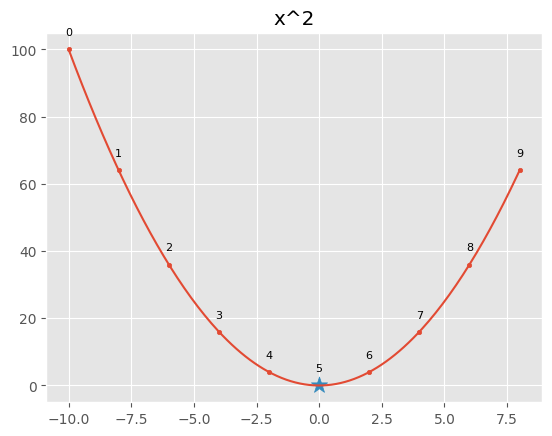

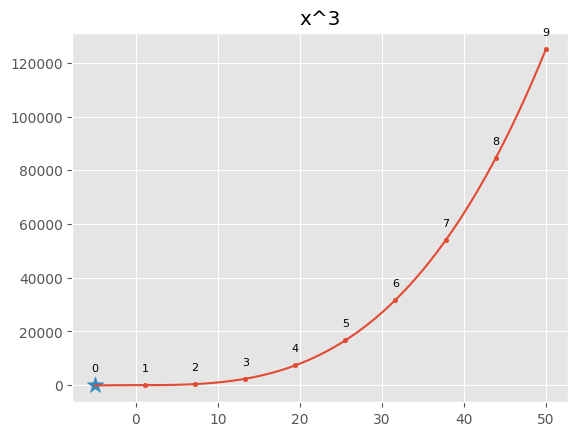

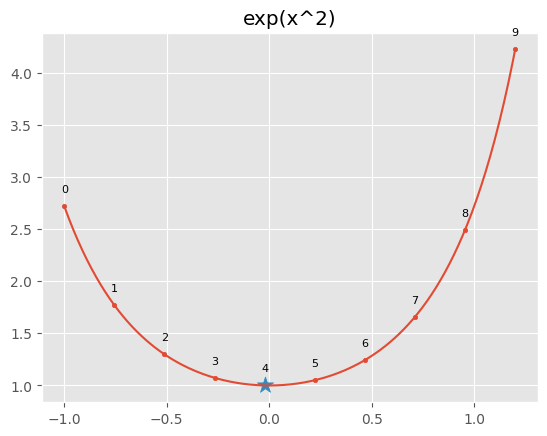

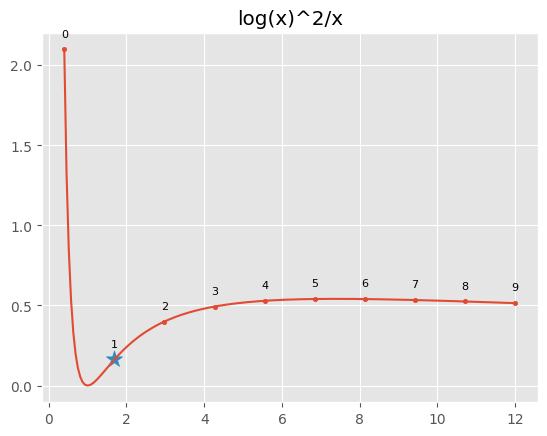

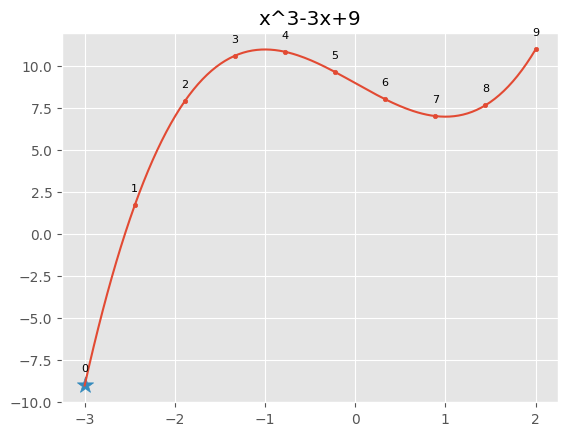

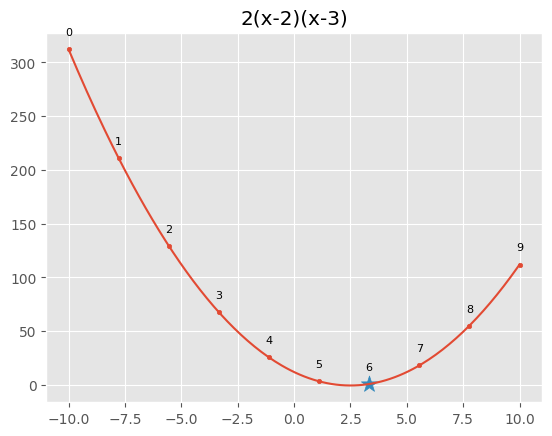

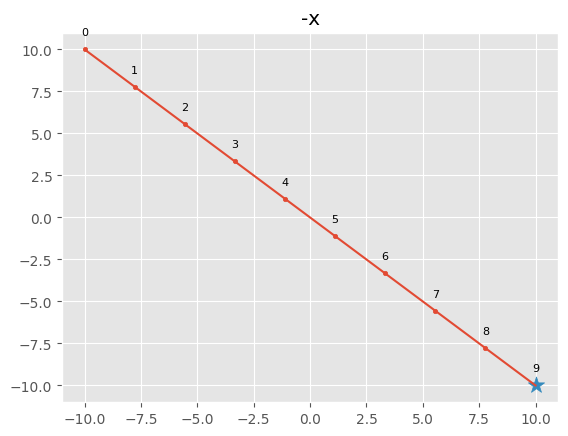

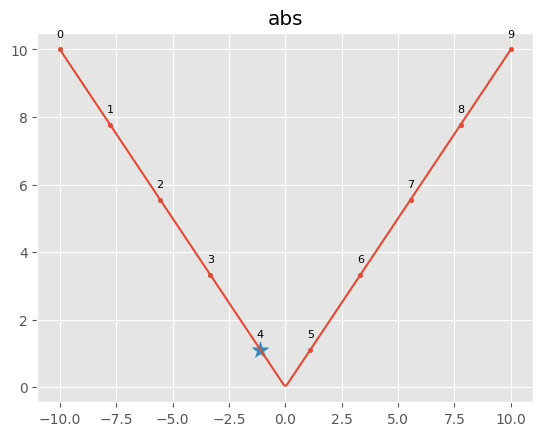

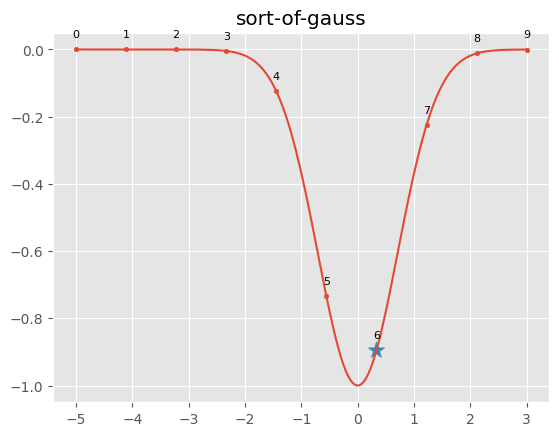

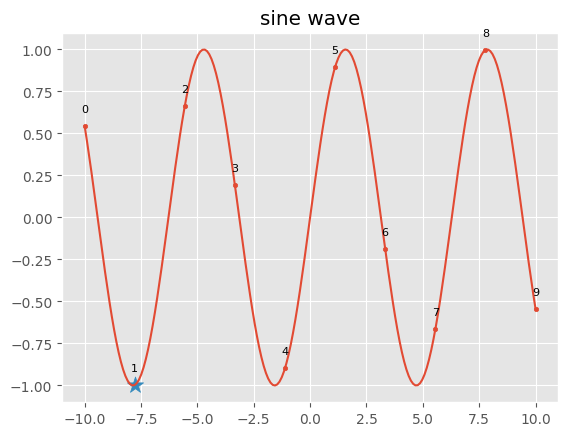

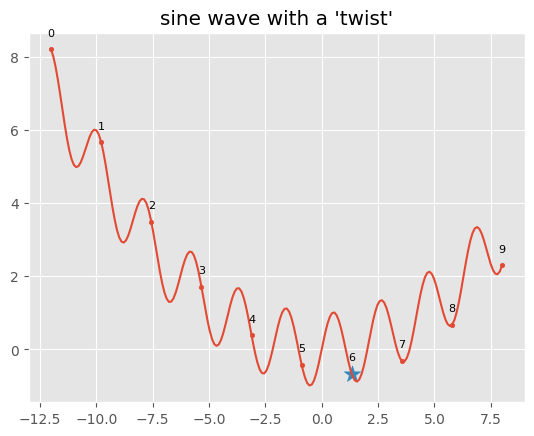

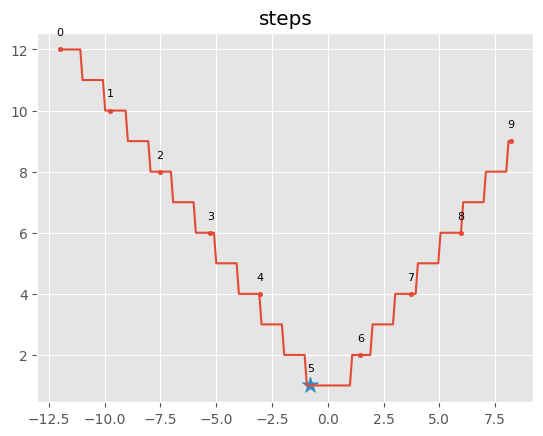

In [11]:
# Your implementation of uniform search here
def unfiorm_search(function: Function, n: int):
    # note that n is the number of points to sample
    # and not the number of function evaluations

    values_to_evaluate = np.linspace(function.domain[0], function.domain[1], n)
    values = [function.evaluate(x) for x in values_to_evaluate]
    minimizer = values_to_evaluate[np.argmin(values)]
    return values_to_evaluate, minimizer

for f in functions:
    points, solution = unfiorm_search(f, max_steps)
    f.plot(points=points, minimizer=solution)

# Random search

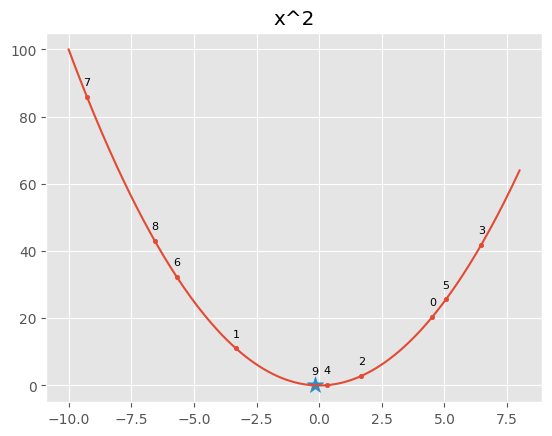

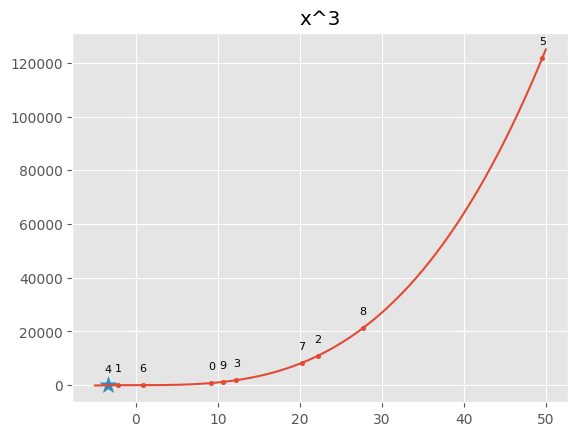

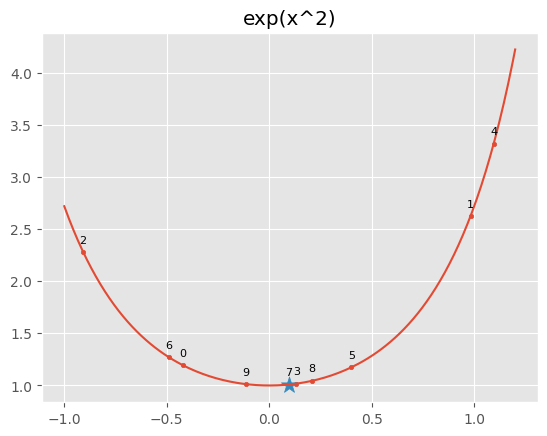

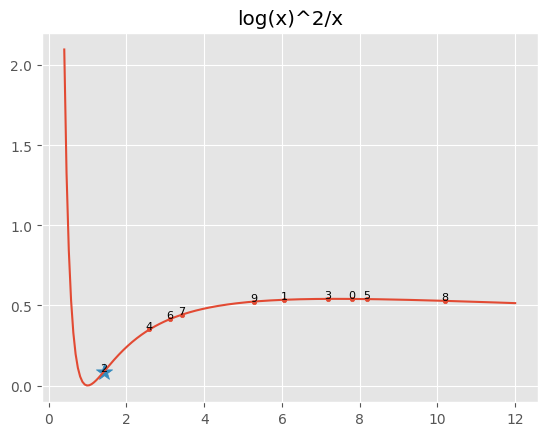

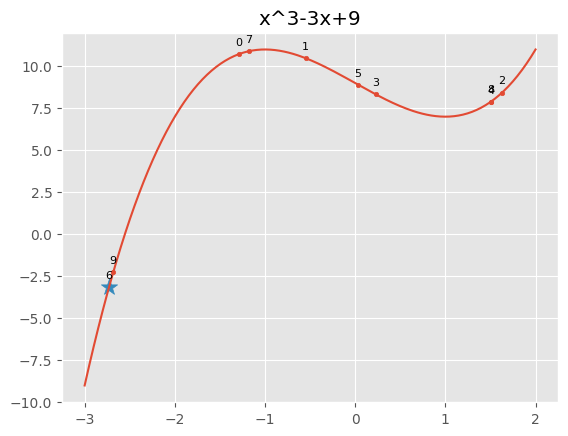

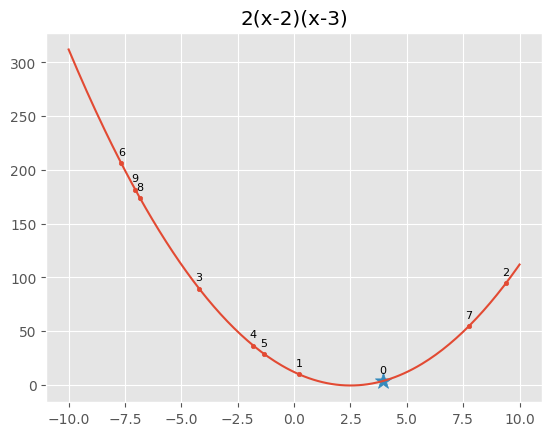

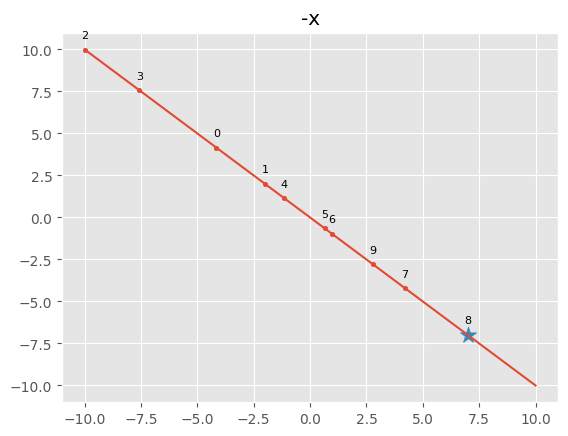

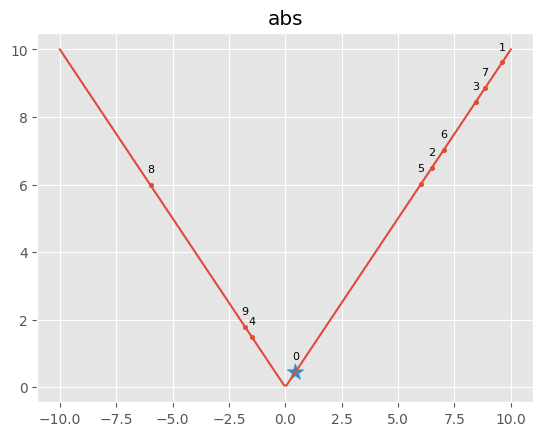

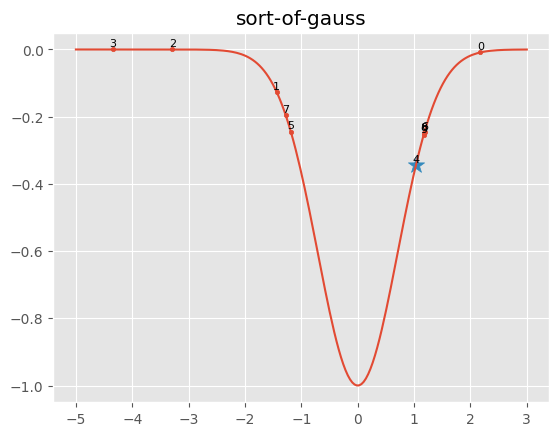

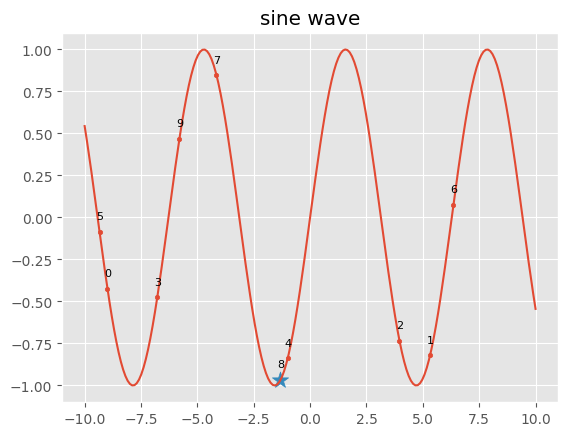

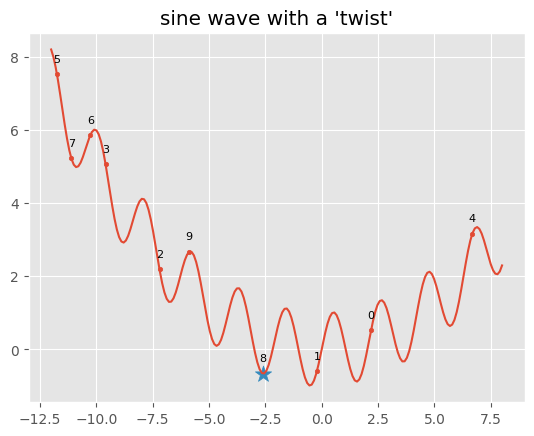

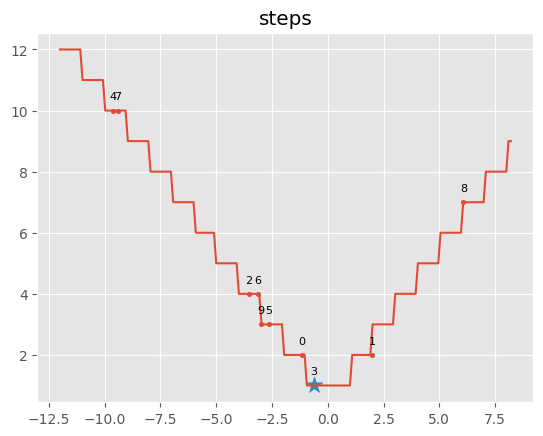

In [13]:
# Your implementation of random search here
def random_search(function: Function, n: int):
    # note that n is the number of points to sample
    
    values_to_evaluate = np.random.uniform(function.domain[0], function.domain[1], n)
    values = [function.evaluate(x) for x in values_to_evaluate]
    minimizer = values_to_evaluate[np.argmin(values)]
    return values_to_evaluate, minimizer

for f in functions:
    points, solution = random_search(f, max_steps)
    f.plot(points=points, minimizer=solution)

# Dichotomous search


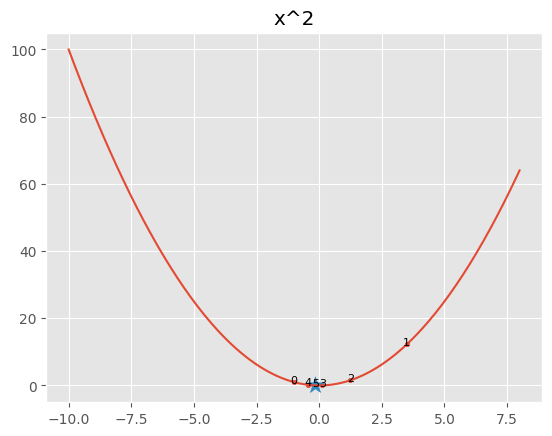

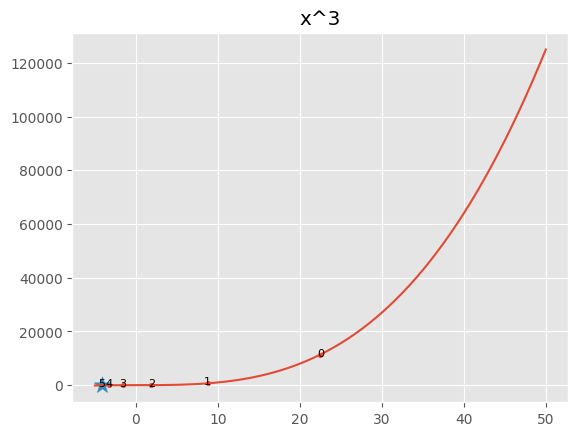

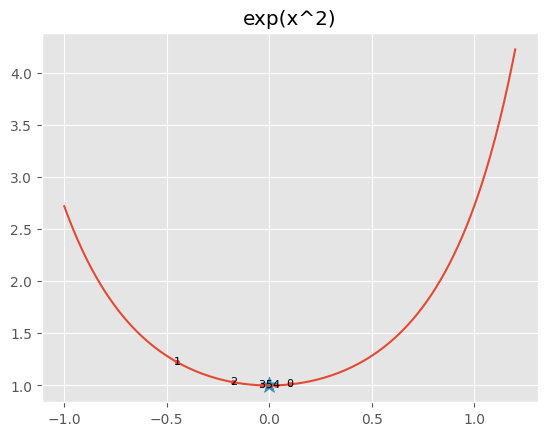

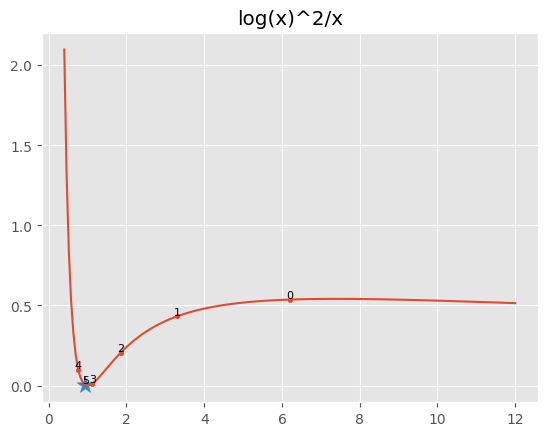

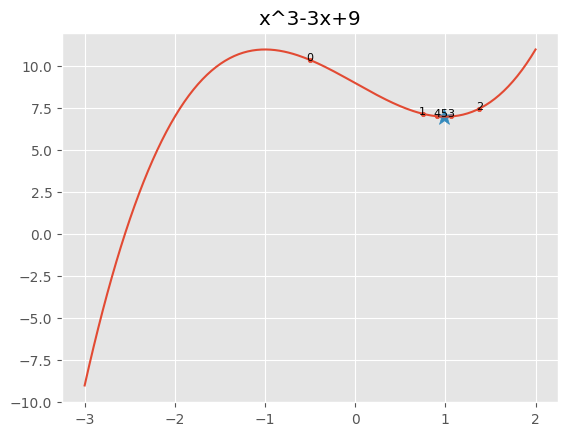

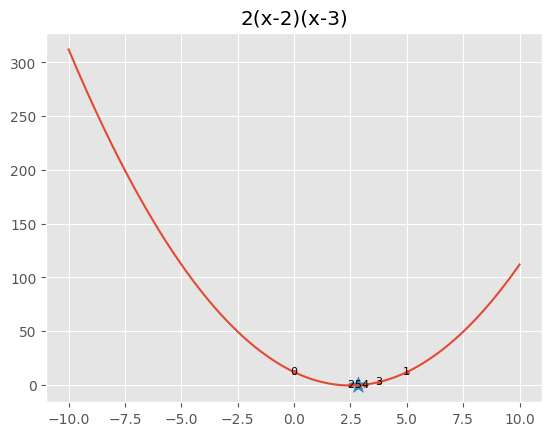

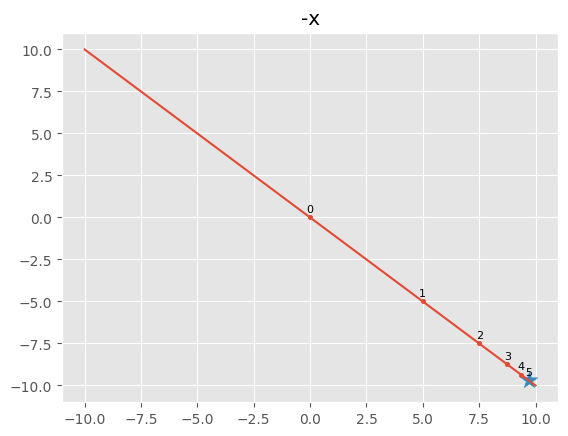

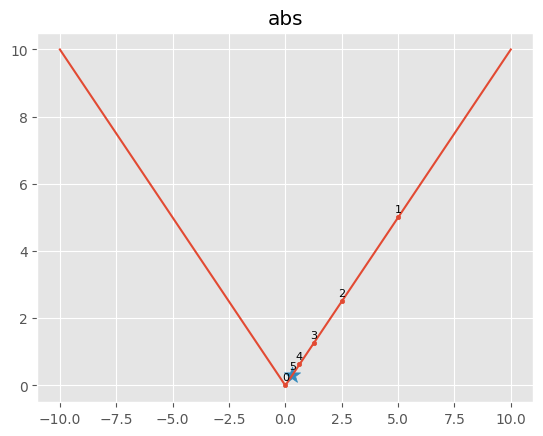

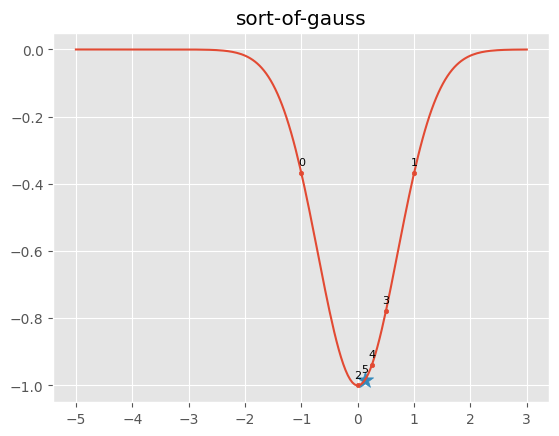

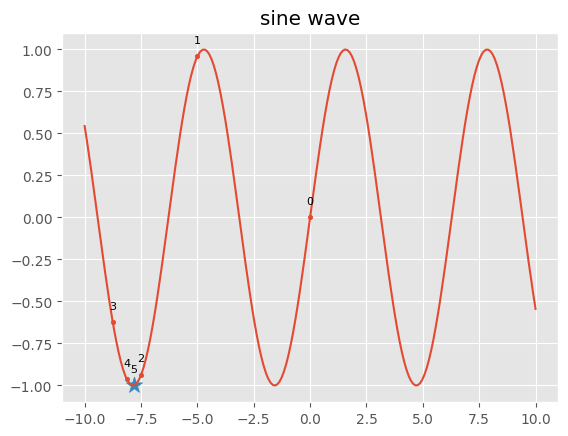

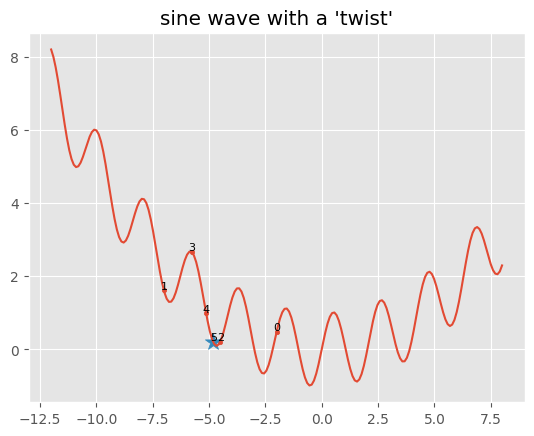

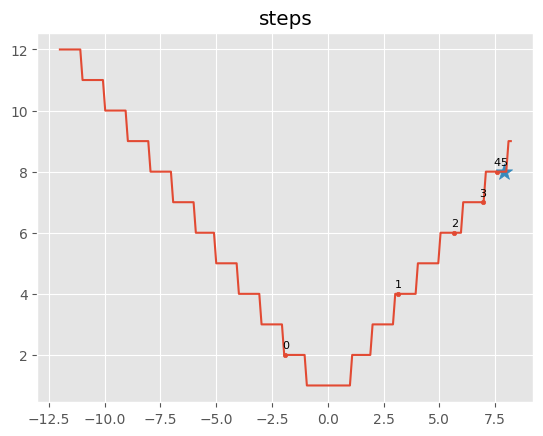

In [18]:
# Your implementation of dichotomous search here
def dichotomous_search(function: Function, n: int):
    # note that n is the number of points to sample
    a, b = function.domain
    m = (a + b) / 2
    delta = 0.001
    visited_points_in_order = [m]
    for i in range(n//2):
        if function.evaluate(m - delta) < function.evaluate(m + delta):
            b = m
        else:
            a = m
        m = (a + b) / 2
        visited_points_in_order.append(m)
    return visited_points_in_order, m

def dichotomous_search_reuse(function: Function, n: int):
    # note that n is the number of points to sample
    a, b = function.domain
    m = (a + b) / 2
    delta = 0.001
    visited_points_in_order = [m]
    values = (function.evaluate(m - delta), function.evaluate(m + delta))
    for i in range(n-2):
        if values[0] < values[1]:
            b = m
        else:
            a = m
        m = (a + b) / 2
        values = (values[1], function.evaluate(m + delta))
        visited_points_in_order.append(m)
    return visited_points_in_order, m

for f in functions:
    points, solution = dichotomous_search(f, max_steps)
    f.plot(points=points, minimizer=solution)


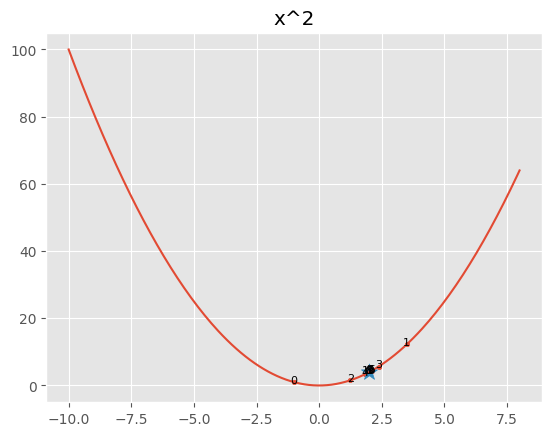

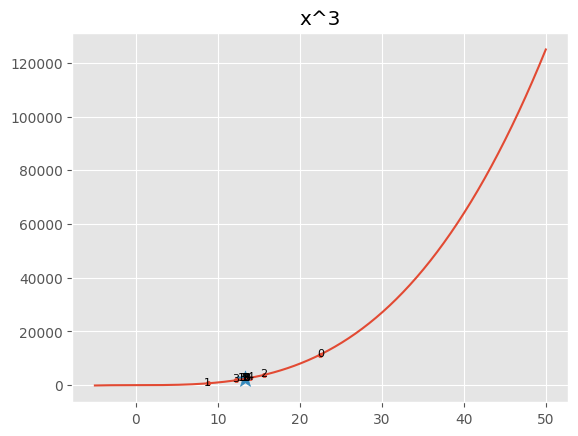

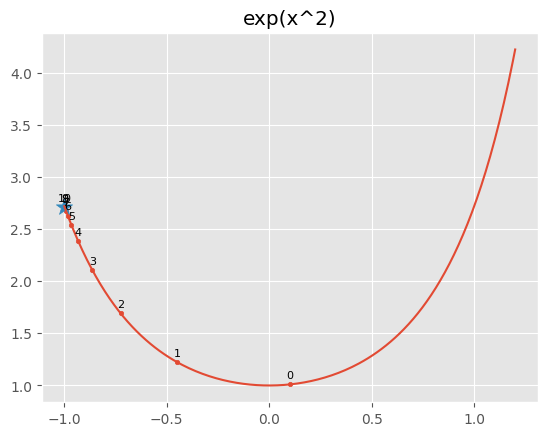

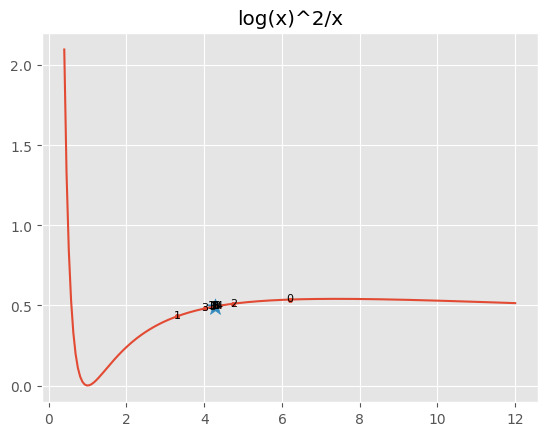

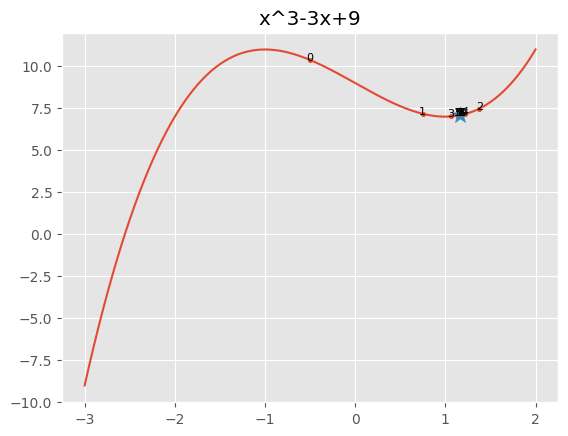

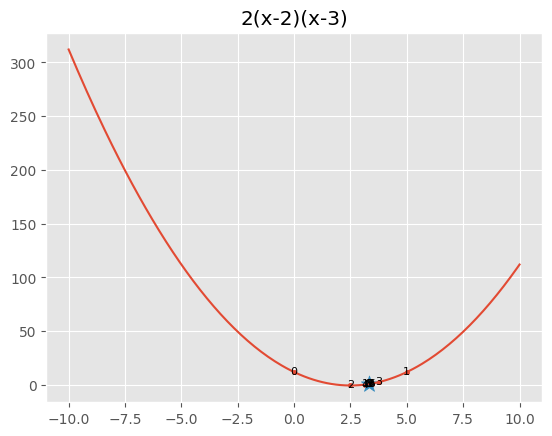

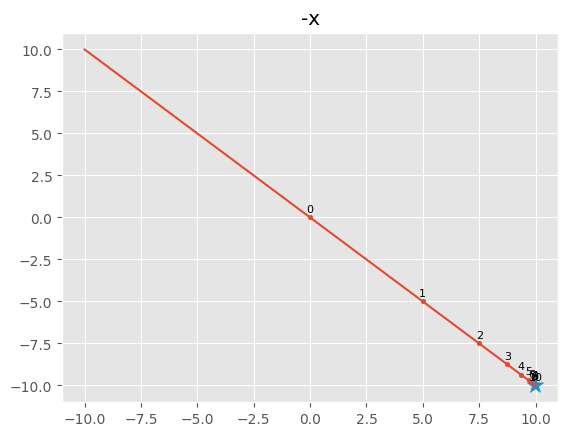

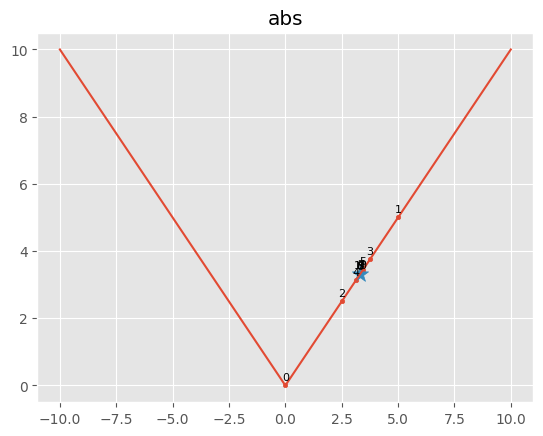

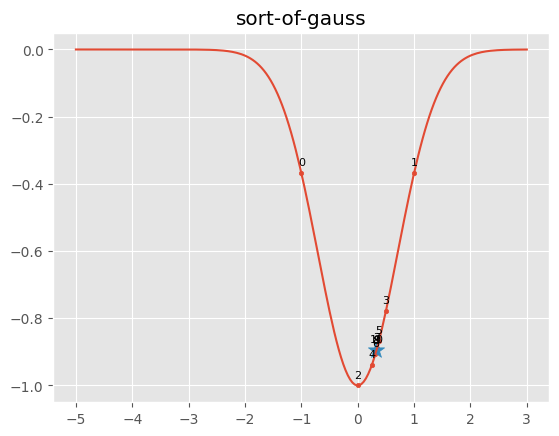

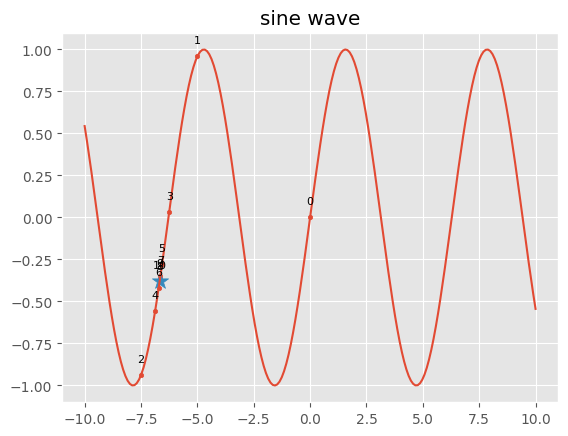

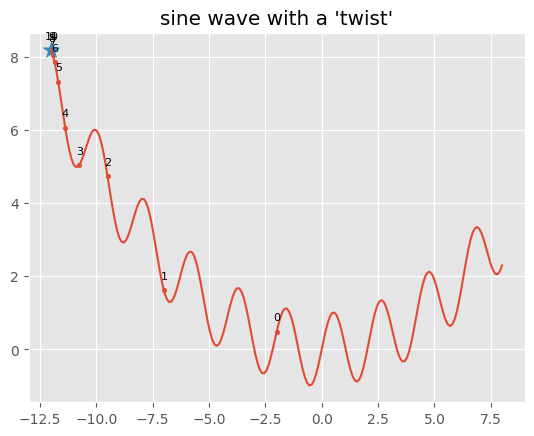

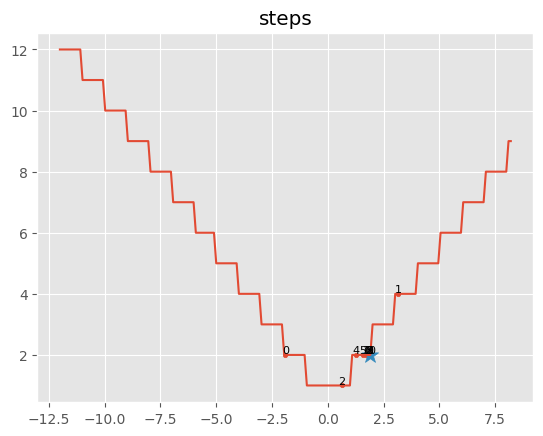

In [19]:
for f in functions:
    points, solution = dichotomous_search_reuse(f, max_steps)
    f.plot(points=points, minimizer=solution)

# Bisection search

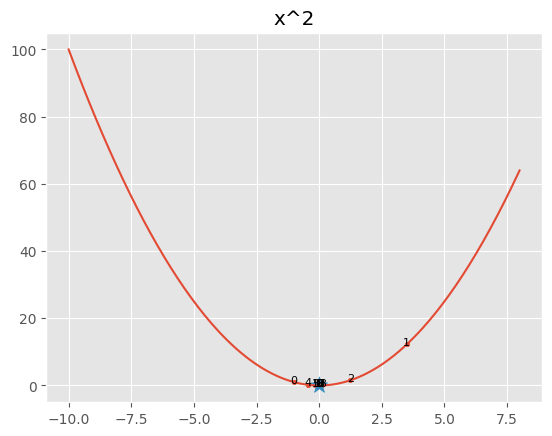

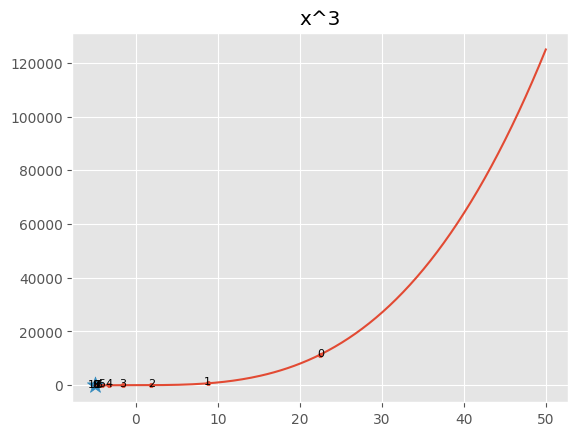

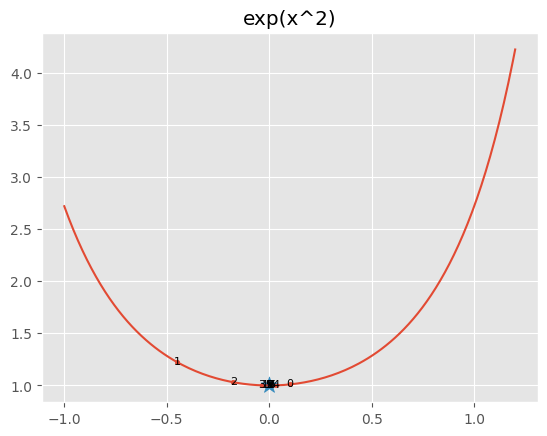

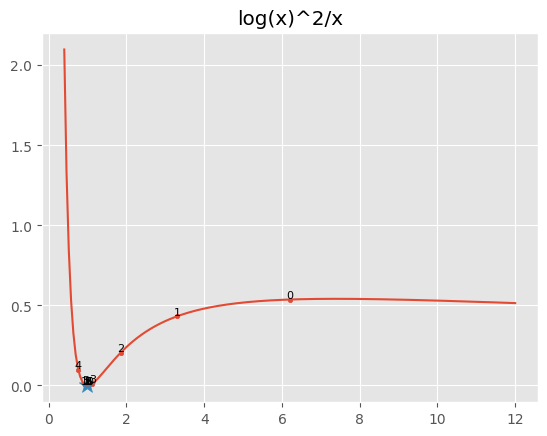

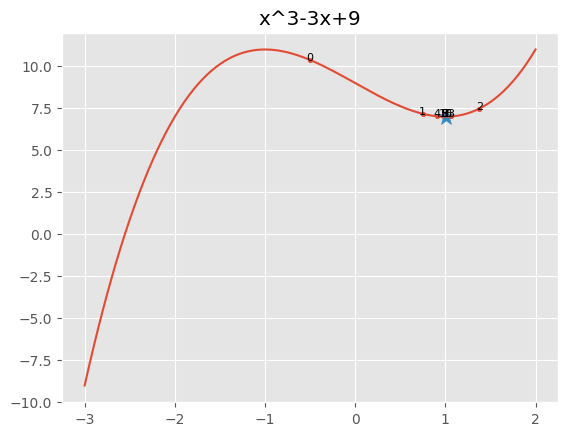

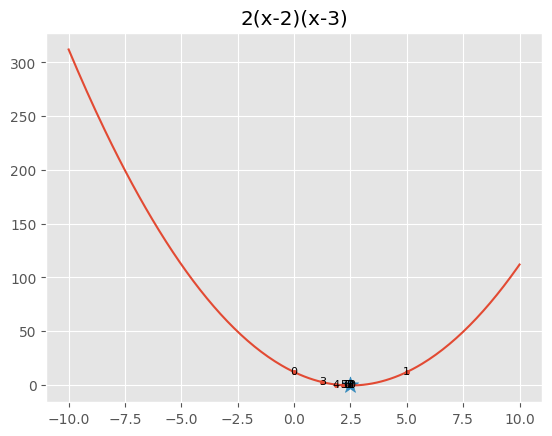

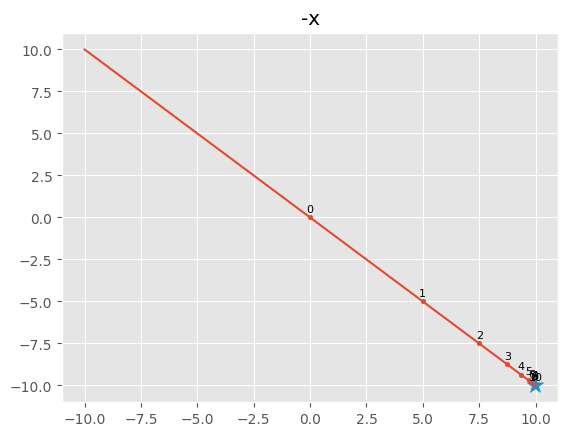

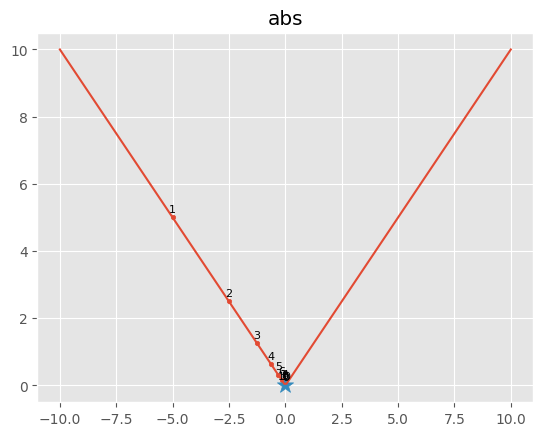

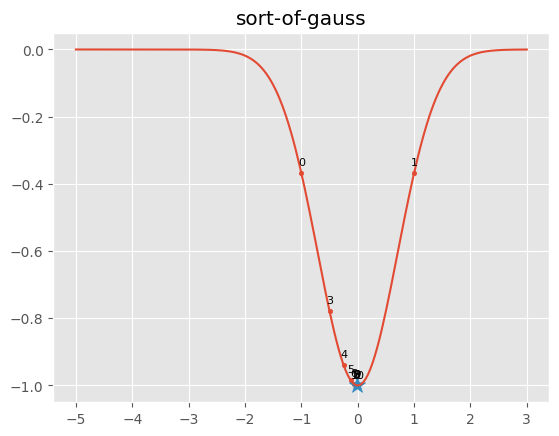

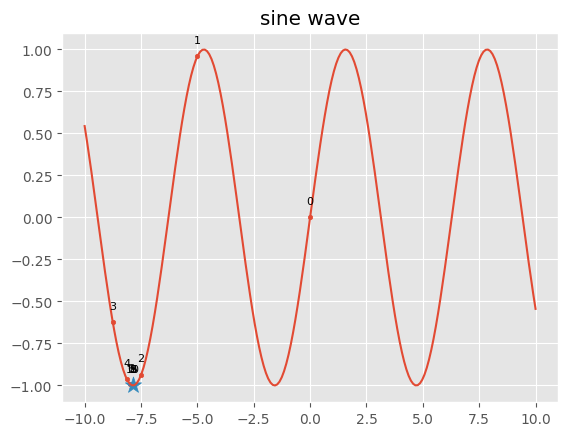

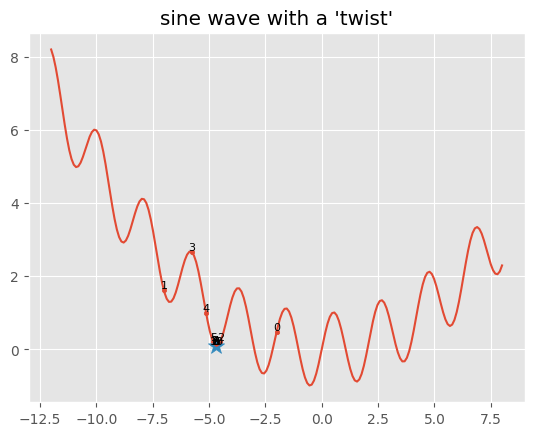

/Users/michalwilinski/.pyenv/versions/3.10.9/envs/default/lib/python3.10/site-packages/autograd/tracer.py:14: UserWarning: Output seems independent of input.
  warnings.warn("Output seems independent of input.")


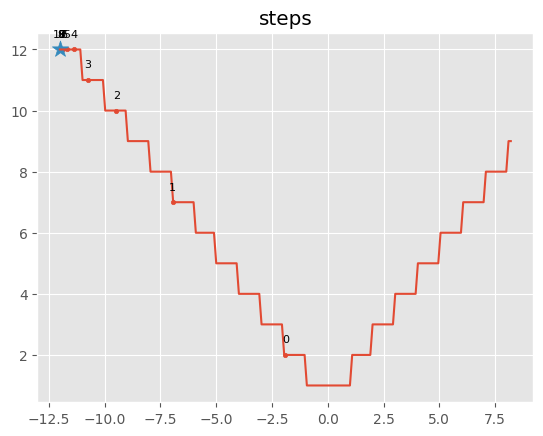

In [20]:
# Your implementation of bisection search here
# Recall that bisection uses derivative, you can access it by using
# function.evaluate_derivative(x).
def bisection_search(function: Function, n: int):
    # note that n is the number of calls to the DERIVATIVE function performed
    a, b = function.domain
    m = (a + b) / 2
    visited_points_in_order = [m]
    for i in range(n):
        if function.evaluate_derivative(m) < 0:
            a = m
        else:
            b = m
        m = (a + b) / 2
        visited_points_in_order.append(m)
    return visited_points_in_order, m

for f in functions:
    points, solution = bisection_search(f, max_steps)
    f.plot(points=points, minimizer=solution)

# Golden-section search

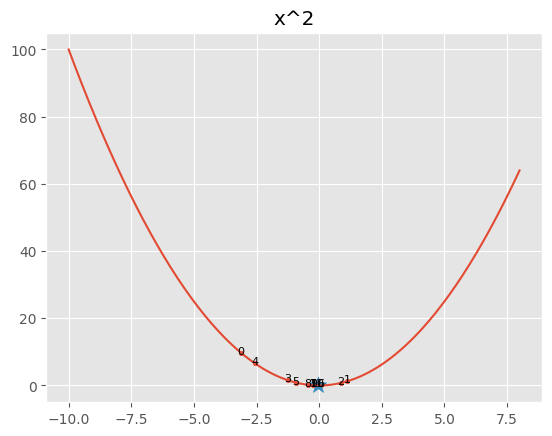

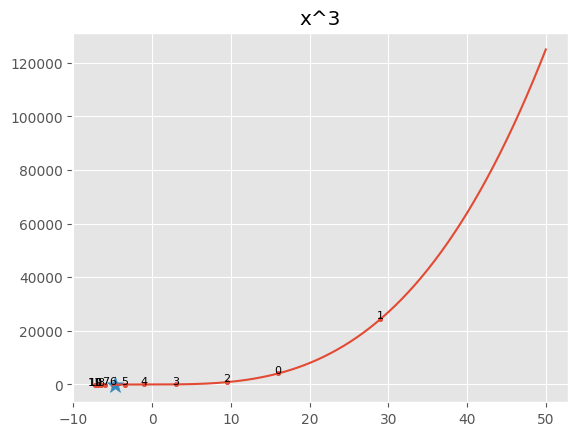

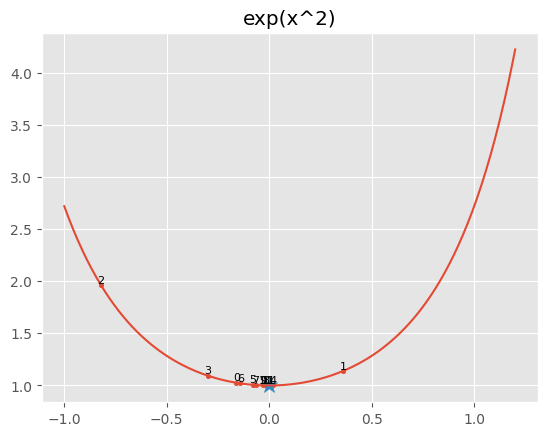

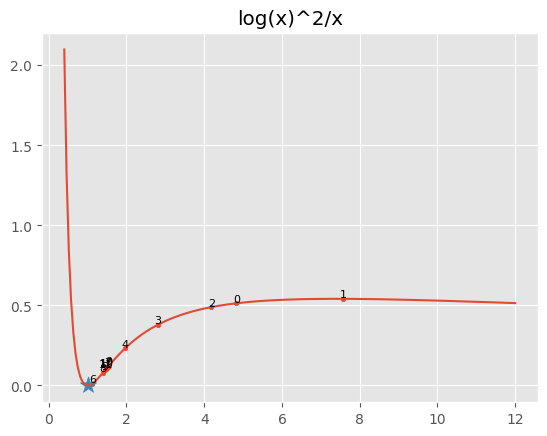

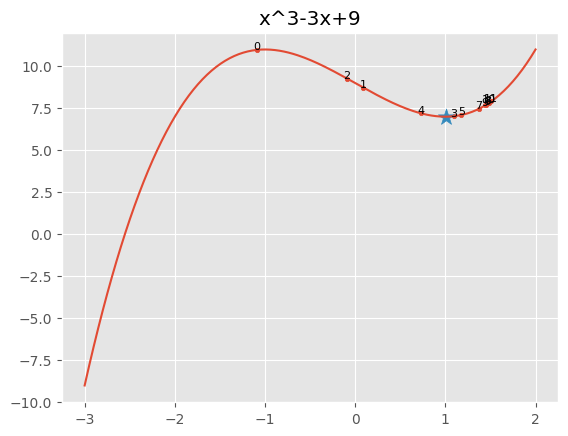

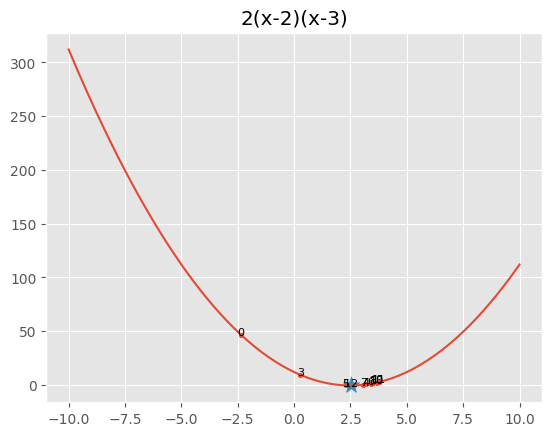

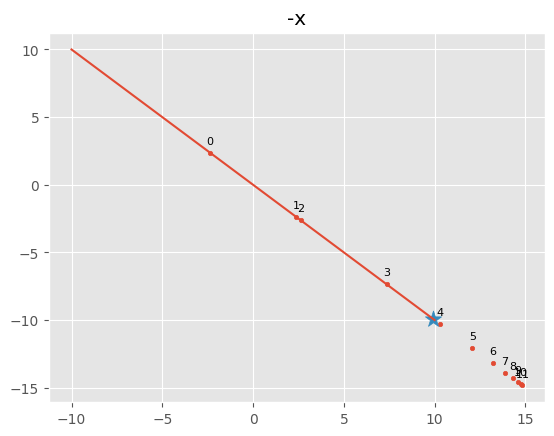

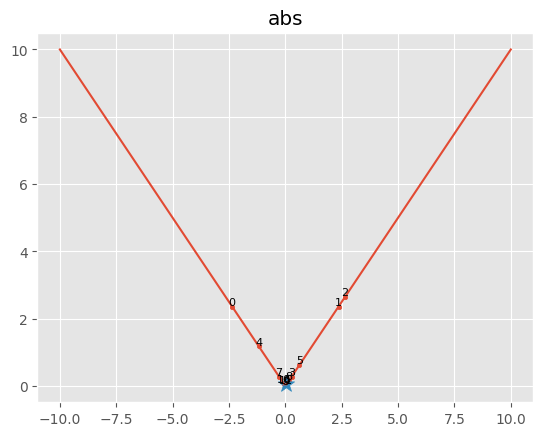

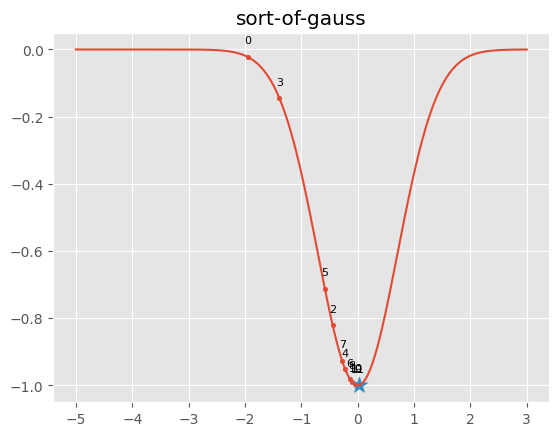

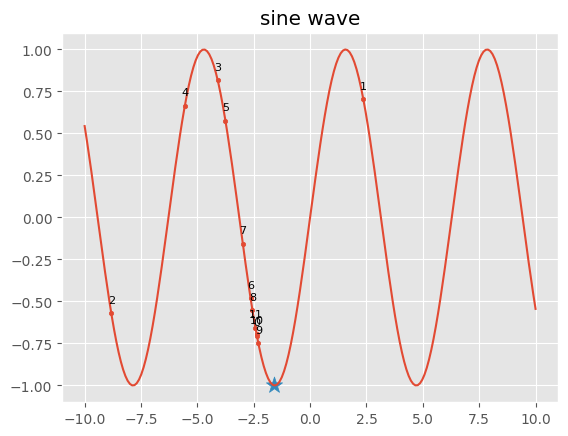

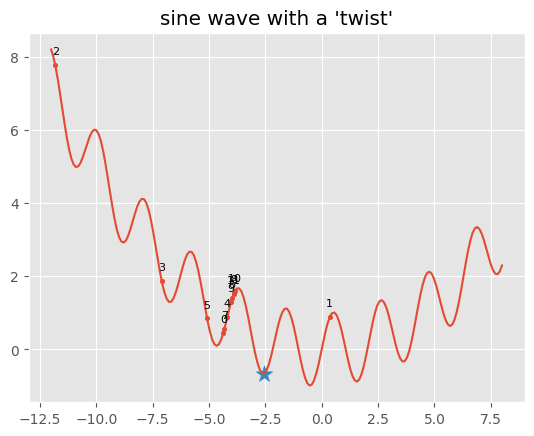

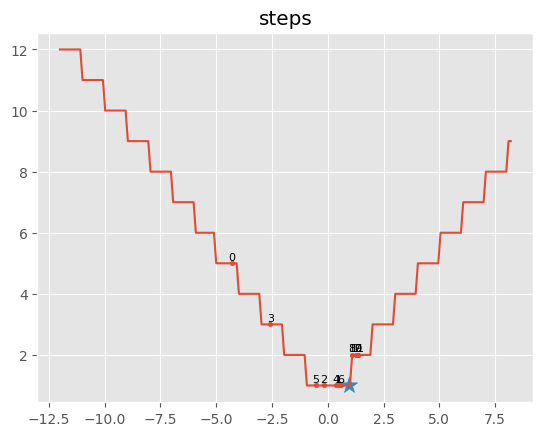

In [21]:
# Your implementation of golden-section search here
def golden_section_search(function: Function, n: int):
    # note that n is the number of points to sample
    # use numpy to get golden ratio and use it to calculate a and b
    phi = (np.sqrt(5) - 1) / 2
    a, b = function.domain
    xl = phi * a + (1 - phi) * b
    xr = (1 - phi) * a + phi * b
    visited_points_in_order = [xl, xr]
    for i in range(n):
        if function.evaluate(xl) < function.evaluate(xr):
            b = xr
            xr = xl
            xl = phi * a + (1 - phi) * b
        else:
            a = xl
            xl = xr
            xr = (1 - phi) * a + phi * b
        visited_points_in_order.append(a+b/2)
    return visited_points_in_order, (a+b)/2

for f in functions:
    points, solution = golden_section_search(f, max_steps)
    f.plot(points=points, minimizer=solution)
    